In [11]:
#matlab packages
import matlab.engine
import matlab
eng = matlab.engine.start_matlab()
#general python packages
import numpy as np
import matplotlib.pyplot as plt
import trackpy as tp
import pandas as pd

In [3]:
def gaussian_kernel(size, sigma):
    """Generates a gaussian kernel
    Parameters
    ----------
    size = int
    sigma = int"""
    half = size//2
    if size % 2 == 0:
        center = half - 0.5
    else:
        center = half
    X, Y = np.mgrid[0:size, 0:size]
    exp = (X - center)**2 / (2 * sigma * sigma) + (Y - center)**2 / (2 * sigma * sigma)
    kern = (1/(2*np.pi*(sigma**2)))*np.exp(-exp)
    
    return kern

In [50]:
#generate fake data
data = np.zeros((7,7))
#add gaussian signal to 7 x 7 array
data[1:5,2:6]=gaussian_kernel(4, 2)

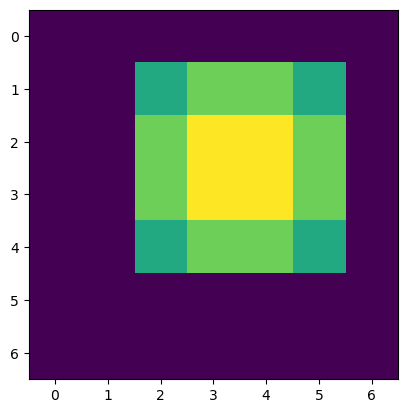

In [51]:
#look
plt.imshow(data)
plt.show()

In [52]:
test = matlab.double(data.tolist())

In [53]:
#return subpixel center and adjust by python indexing
x,y,sigma = eng.radialcenter(test, nargout=3)
x = x-1
y = y-1

In [54]:
centroids = pd.DataFrame([x,y,sigma]).T
centroids.columns = ["x","y","sigma"]

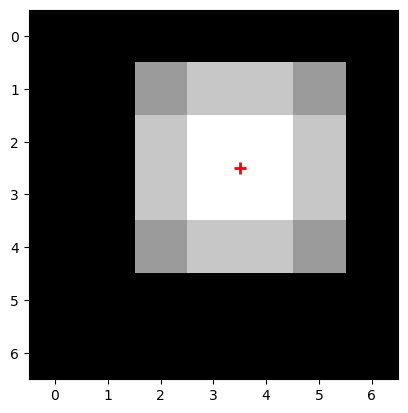

In [55]:
#overlay centroid
tp.annotate(centroids, data, plot_style=dict(marker='+', markersize=8),ax=plt.gca())
plt.show()

In [62]:
#add edge of another dot
data[0:2,0:2]=gaussian_kernel(2, 3)

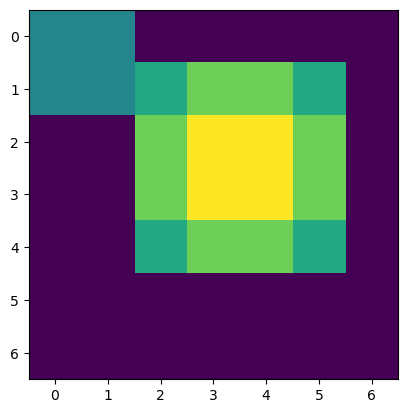

In [63]:
#look
plt.imshow(data)
plt.show()

In [64]:
test = matlab.double(data.tolist())

In [65]:
#return subpixel center and adjust by python indexing
x,y,sigma = eng.radialcenter(test, nargout=3)
x = x-1
y = y-1

In [66]:
centroids = pd.DataFrame([x,y,sigma]).T
centroids.columns = ["x","y","sigma"]

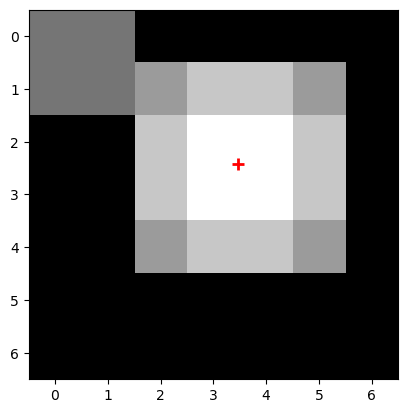

In [67]:
#overlay centroid
tp.annotate(centroids, data, plot_style=dict(marker='+', markersize=8),ax=plt.gca())
plt.show()

looks like the function is working.